# Chapter 2  Distributions

## Histograms
The most common representation of a distribution is a histogram. which is a graph that shows the **frequency** of each value


In [9]:
%matplotlib inline  

import thinkstats2
import thinkplot

In [7]:
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [4]:
hist.Freq(2) # hist[2]

2

In [5]:
hist.Values()

[1, 2, 3, 5]

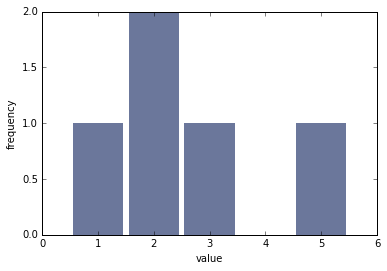

In [10]:
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')


## NSFG variables

In [12]:
import nsfg

Histogram of pregnancy length in weeks

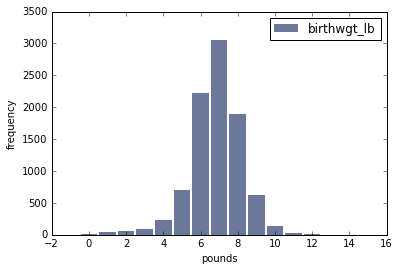

In [13]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')


Histogram of pregnancy lengths

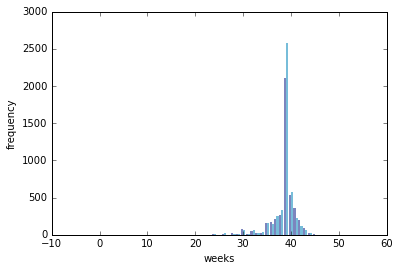

In [14]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='weeks', ylabel='frequency')


## Summarizing distributions

## Glossary
- **distribution**: The values that appear in a sample and the frequency of each.
- **histogram**: A mapping from values to frequencies, or a graph that shows this mapping.
- **frequency**: The number of times a value appears in a sample.
- **mode**: The most frequent value in a sample, or one of the most frequent values.
- **normal distribution**: An idealization of a bell-shaped distribution; also known as a Gaussian distribution.
- **uniform distribution**: A distribution in which all values have the same frequency.
- **tail**: The part of a distribution at the high and low extremes.
- **central tendency**: A characteristic of a sample or population; intuitively, it is an average or typical value.
- **outlier**: A value far from the central tendency.
- **spread**: A measure of how spread out the values in a distribution are.
- **summary statistic**: A statistic that quantifies some aspect of a distribution, like central tendency or spread.
- **variance**: A summary statistic often used to quantify spread.
- **standard deviation**: The square root of variance, also used as a measure of spread.
- **effect size**: A summary statistic intended to quantify the size of an effect like a difference between groups.
- **clinically significant**: A result, like a difference between groups, that is relevant in practice.